In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function
from gplearn.fitness import make_fitness

In [2]:
x_train = np.arange(-1.0, 1.1, 0.1)
y_train = np.array([0.,-0.1629,-0.2624,-0.3129,-0.3264,-0.3125,-0.2784,-0.2289,-0.1664,-0.0909,0.0,0.1111,0.2496,0.4251,0.6496,0.9375,1.3056,1.7731,2.3616,3.0951,4.0000])

In [3]:
x_train = np.reshape(x_train, (-1,1))

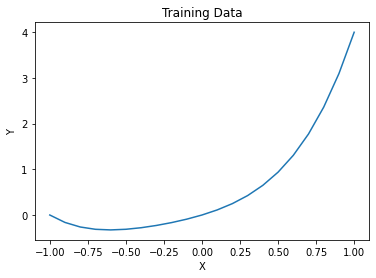

In [30]:
plt.plot(x_train, y_train)
plt.title('Training Data')
plt.xlabel('X');plt.ylabel('Y')
plt.show()

In [5]:
# Make exponential function to be used by Regressor
# as it is not defined as default function

def _exp(x1):
    e = np.exp(x1)
    return np.nan_to_num(e, nan=float("inf"))

exp = make_function(function=_exp,
                    name='exp',
                    arity=1)

# Create sum of absolute error function
# to be used as metric

def _sae(y, y_pred, w):
    """ The sum absolute error between y and y_pred """
    return np.sum(np.abs(y-y_pred)*w)

sae = make_fitness(_sae, greater_is_better=False)

In [24]:
def plot_fit_versus_data(reg):
    """ Function for plotting the fitted model against the actual data """
    plt.title('Fit vs. actual data')
    plt.plot(x_train, y_train, label='true data')
    plt.plot(x_train, reg.predict(x_train), label='approximation', linestyle='--')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
    
def plot_evolution(reg):
    best_lengths = reg.run_details_['best_length']
    best_fitness = reg.run_details_['best_fitness']
    generations = reg.run_details_['generation']
    plt.title('Fitness and length of best individual over generations')
    plt.plot(generations, best_lengths, label='Best length')
    plt.plot(generations, best_fitness, label='Best fitness')
    plt.xlabel('Generation')
    plt.ylabel(' ')
    plt.legend()
    plt.show()
    
def eval_model(reg):
    print('Final Program:\n',reg._program)
    print()
    print('Sum Absolute Error: {:.2f}'.format(_sae(y_train, reg.predict(x_train),1)))
    print('R² Score: {:.2f}'.format(reg.score(x_train,y_train)))
    plot_fit_versus_data(reg)
    plot_evolution(reg)

In [28]:
population_size = 1000
func_set = ('add','sub','mul','div','log','sin','cos',exp)
n_generations = 50
p_crossover = 0.7
p_mutation = 0.0
metric = sae

reg = SymbolicRegressor(
    population_size = population_size,
    generations = n_generations,
    p_crossover = p_crossover,
    p_subtree_mutation=p_mutation, 
    p_hoist_mutation=p_mutation, 
    p_point_mutation=p_mutation,
    function_set = func_set,
    metric=sae,
    verbose = 1
)

reg = reg.fit(x_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


<ipython-input-5-954cc93d03d7>:5: RuntimeWarning: overflow encountered in exp
  e = np.exp(x1)
/home/pscl/scienv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/pscl/scienv/lib/python3.8/site-packages/gplearn/functions.py:46: RuntimeWarning: overflow encountered in multiply
  return self.function(*args)


   0    14.71              inf        7          3.97068              N/A     24.87s
   1    13.22          20.6547        7          3.97068              N/A     21.52s
   2    17.30          18.3969       13          1.71802              N/A     20.34s
   3    12.42           12.595       29          1.18406              N/A     18.02s
   4    16.36          10.5711       29          1.18406              N/A     18.54s
   5    16.19          11.8279       34         0.845101              N/A     19.87s
   6    21.91          16.8246       34         0.845101              N/A     28.25s
   7    30.57          26.4802       33         0.631563              N/A     24.37s
   8    33.13          42.0426       31         0.626482              N/A     24.04s
   9    33.66          31.1463       37         0.541885              N/A     20.22s
  10    31.08           29.572       50         0.454768              N/A     23.33s
  11    30.94          16.0404       64         0.447976         

Final Program:
 mul(add(sub(exp(sin(X0)), cos(X0)), mul(mul(sin(sin(X0)), sin(add(0.508, div(mul(sub(exp(sin(sin(X0))), div(cos(X0), div(sub(exp(sin(X0)), cos(X0)), X0))), sub(exp(sin(X0)), sin(sin(sin(X0))))), cos(0.404))))), add(0.508, -0.575))), sub(div(exp(X0), cos(0.404)), sin(sin(X0))))

Sum Absolute Error: 0.21
R² Score: 1.00


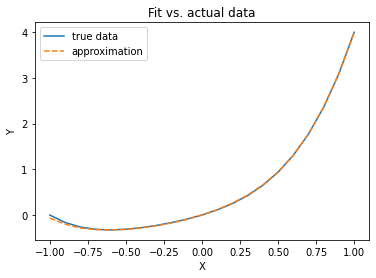

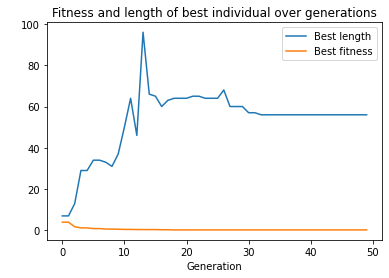

In [29]:
eval_model(reg)